<a href="https://colab.research.google.com/github/VillaCamacho-Miguel/Redes-Neuronales/blob/main/MLP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
#El siguiente código implementa un modelo de red neuronal para clasificar imágenes del conjunto de datos Cifar10
# Cargar los datos de entrenamiento y validación
(x_train, y_train), (x_val, y_val) = keras.datasets.cifar10.load_data()

# Normalizar los datos de las imágenes
x_train = x_train.astype("float32") / 255
x_val = x_val.astype("float32") / 255

# Convertir las etiquetas a vectores one-hot
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)

# Cargar los datos de prueba
(x_test, y_test) = keras.datasets.cifar10.load_data()[1]
x_test = x_test.astype("float32") / 255
y_test = keras.utils.to_categorical(y_test, 10)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluar el modelo con datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Accuracy:', test_acc)

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 19s 6ms/step - loss: 1.5004 - accuracy: 0.4569 - val_loss: 1.2099 - val_accuracy: 0.5618
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1266 - accuracy: 0.6011 - val_loss: 1.0466 - val_accuracy: 0.6293
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9883 - accuracy: 0.6508 - val_loss: 1.0619 - val_accuracy: 0.6284
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9001 - accuracy: 0.6835 - val_loss: 0.9890 - val_accuracy: 0.6640
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8294 - accuracy: 0.7095 - val_loss: 0.9055 - val_accuracy: 0.6840
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7780 - accuracy: 0.7262 - val_loss: 0.9222 - val_accuracy: 0.6812
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step 

In [3]:
cifar_10 = keras.datasets.cifar10

(train_imgs, train_labels), (test_imgs, test_labels) = cifar_10.load_data()

train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

model = keras.Sequential([
keras.layers.Flatten(input_shape=(32, 32, 3)),
keras.layers.Dense(512, activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(256, activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(256, activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(256, activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(50, activation='softmax')
])

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.fit(train_imgs, train_labels, batch_size=256, epochs=50)

test_loss, test_acc  = model.evaluate(test_imgs, test_labels,  verbose= 2)
print('\nExactitud en el conjunto de prueba: ', test_acc)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


196/196 [==============================] - 3s 5ms/step - loss: 2.1015 - accuracy: 0.2442
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8540 - accuracy: 0.3286
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7835 - accuracy: 0.3543
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7289 - accuracy: 0.3753
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6930 - accuracy: 0.3920
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6721 - accuracy: 0.3995
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6489 - accuracy: 0.4085
Epoch 8/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6165 - accuracy: 0.4186
Epoch 9/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6032 - accuracy: 0.4240
Epoch 10/50
196/196 [==============================] - 1s 6ms/step - loss: 1.5964 - accuracy: 0.4277
Epoch 11/5

In [11]:

import requests
from PIL import Image
import numpy as np
from io import BytesIO

# URL de la imagen que deseas abrir
url = "https://upload.wikimedia.org/wikipedia/commons/e/e0/Air_india_b747-400_vt-esn_arp.jpg"

# Descargar la imagen desde la URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Redimensionar la imagen
img = img.resize((32, 32))  # Cambiar (32, 32) por las dimensiones de entrada del modelo

# Convertir la imagen a un array de numpy
img = np.array(img)
img = img.reshape(1, 32, 32, 3)

# Realizar la predicción
predictions = model.predict(img)

# Obtener el nombre de la clase correspondiente
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class = class_names[np.argmax(predictions)]

print('La imagen representa:', predicted_class)


1/1 [==============================] - 0s 30ms/step
La imagen representa: airplane


In [5]:
#El siguiente código implementa un modelo de red neuronal para clasificar imágenes del conjunto de datos Fashion MNIST

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6376 - accuracy: 0.7753
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4592 - accuracy: 0.8352
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4192 - accuracy: 0.8500
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3956 - accuracy: 0.8587
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3765 - accuracy: 0.8648
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3644 - accuracy: 0.8680
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3548 - accuracy: 0.8723
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3447 - accuracy: 0.8754
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3381 - accuracy: 0.8765
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.330

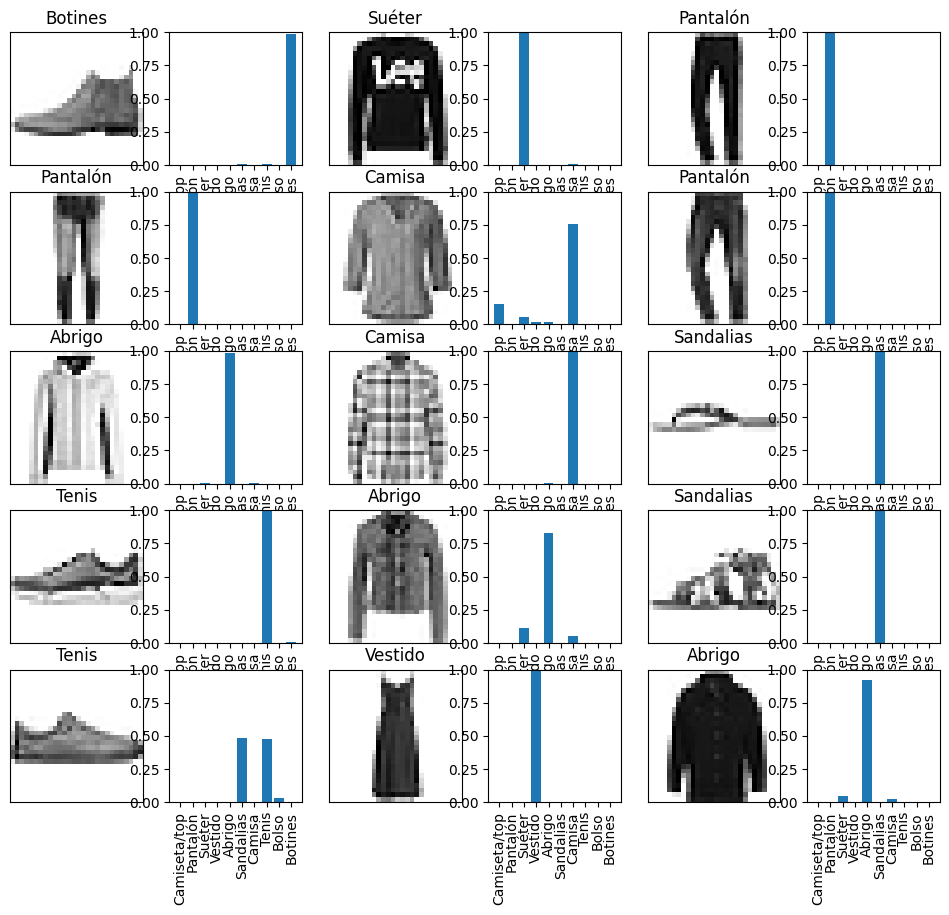

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset de moda de Keras
fashion_mnist = keras.datasets.fashion_mnist
# Dividir el dataset en datos de entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Definir las etiquetas para las clases de moda
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalias', 'Camisa', 'Tenis', 'Bolso', 'Botines']

# Preprocesar los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

# Definir el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])


# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=10)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nExactitud en el conjunto de prueba:', test_acc)

# Hacer predicciones con el modelo
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Mostrar algunas imágenes junto con las predicciones del modelo
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(class_names[test_labels[i]])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.bar(range(10), predictions[i])
    plt.ylim([0, 1])
    plt.xticks(range(10), class_names, rotation=90)
plt.show()


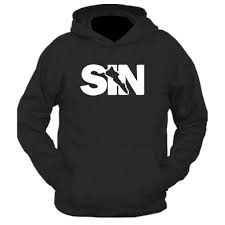

1/1 [==============================] - 0s 96ms/step
[[-1.7711989879608154, -3.864720344543457, 1.7831788063049316, -1.1547621488571167, 3.6641054153442383, -9.027588844299316, 1.4762823581695557, -6.436899662017822, -1.629187822341919, -6.709950923919678]]


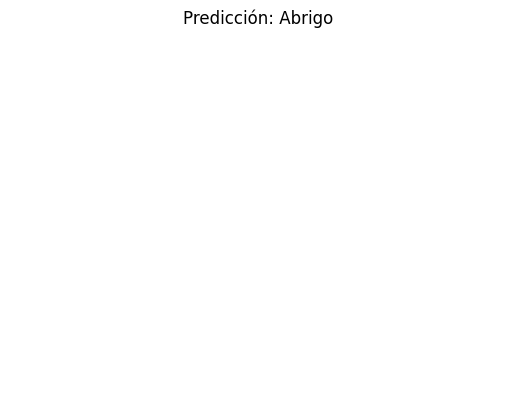

In [23]:
import PIL.ImageOps
from PIL import Image
import cv2
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Definir las etiquetas para las clases de moda
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalias', 'Camisa', 'Tenis', 'Bolso', 'Botines']

# URL de la imagen que deseas abrir
url = "https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcTjqu23yFrxnVyBLOb4AY8qboOmyl19Lnpt6UmJ2W0SYXPYfocF"  # Reemplaza "https://example.com/image.jpg" con la URL de la imagen que deseas clasificar

# Descargar la imagen desde la URL
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("L")
display(img)

im = PIL.ImageOps.invert(img)
im_resized = im.resize((28,28))
im_resized.save("down.png","PNG")
img = cv2.imread("down.png",0)  
img = img / 255 
img = np.reshape(img,(1, 28, 28, 1)) 
lista = model.predict(img)
lista = lista.tolist()

print(lista)
# Obtener la clase con mayor probabilidad
predicted_class = np.argmax(lista[0])

# Mostrar la imagen con la predicción del modelo¿
plt.title("Predicción: " + class_names[predicted_class])
plt.axis('off')
plt.show()


# Clasificacion de sentimientos
Lo siguiente es un ejemplo de clasificación de texto utilizando la base de datos IMDb para la detección de sentimientos. Aquí se utiliza la biblioteca Keras para construir una red neuronal que clasifique críticas de películas en positivas o negativas.



In [ ]:
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

results = model.evaluate(x_test, y_test)
print(results)


17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/20
49/49 [==============================] - 6s 107ms/step - loss: 0.4644 - accuracy: 0.8104 - val_loss: 0.3426 - val_accuracy: 0.8783
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2728 - accuracy: 0.9041 - val_loss: 0.2865 - val_accuracy: 0.8897
Epoch 3/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2121 - accuracy: 0.9243 - val_loss: 0.2980 - val_accuracy: 0.8790
Epoch 4/20
49/49 [==============================] - 2s 33ms/step - loss: 0.1800 - accuracy: 0.9375 - val_loss: 0.2852 - val_accuracy: 0.8863
Epoch 5/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1564 - accuracy: 0.9450 - val_loss: 0.3006 - val_accuracy: 0.8828
Epoch 6/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1384 - accuracy: 0.9536 - val_loss: 0.3165 - val_accuracy: 0.8789
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1244 - accura

In [ ]:
word_index = imdb.get_word_index()

def encode_review(review):
    words = review.lower().split()
    encoded = []
    for word in words:
        if word in word_index and word_index[word] < 10000:
            encoded.append(word_index[word] + 3)
    return encoded

def predict_sentiment(review):
    encoded_review = encode_review(review)
    vectorized_review = vectorize_sequences([encoded_review])
    return model.predict(vectorized_review)[0][0]

print(predict_sentiment('This is a really good movie. i like it at all'))
print(predict_sentiment('This movie was terrible. I did not like it at all.'))

text = 'This is a really good movie. i like it at all'
val = predict_sentiment(text);

if val > 0.6:
  print('Positivo')
elif val < 0.4:
  print('Negativo')
else:
  print('Neutral')

1/1 [==============================] - 0s 29ms/step
0.6958495
1/1 [==============================] - 0s 30ms/step
0.17520554
1/1 [==============================] - 0s 27ms/step
Positivo
